In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv


# **Importing and checking dataset**

In [2]:
# Importing Dataset
import pandas as pd
emp_sal = pd.read_csv("/kaggle/input/employee-salaries-analysis/Employee_Salaries.csv")
print("Dataset Imported Successfully")

Dataset Imported Successfully


In [3]:
# Dropping unwanted columns
emp_sal = emp_sal.drop(columns = ["Department","Department_Name","Division","Gender","Overtime_Pay","Longevity_Pay"])

In [4]:
# Checking Dataset
emp_sal.head()

,Base_Salary,Grade
0,175873.000,M2
1,145613.360,M3
2,136970.000,M3
3,89432.694,21
4,78947.000,16


# **Data cleaning and preprocessing**

In [5]:
# Remove all alphabets from the 'Employee Grade' column
emp_sal['Grade'] = emp_sal['Grade'].str.replace(r'\D', '', regex=True)
emp_sal

,Base_Salary,Grade
0,175873.0000,2
1,145613.3600,3
2,136970.0000,3
3,89432.6940,21
4,78947.0000,16
...,...,...
10286,134500.0000,28
10287,215032.1000,NaN
10288,84365.5529,18
10289,98228.0000,21


In [6]:
# Checking for missing values
missing_sal = emp_sal['Base_Salary'].isnull().sum()
missing_grade = emp_sal['Grade'].isnull().sum()

print("Missing Values in Salary Column:", missing_sal)
print("Missing Values in Grade Column:", missing_grade)

Missing Values in Salary Column: 0
Missing Values in Grade Column: 33


In [8]:
# Locating indices of missing grades (to derive patterns and insight)
missing_grade_locations = emp_sal[emp_sal['Grade'].isnull()].index

# Displaying the locations where values are missing in the 'Employee Grade' column
print(f"Locations with missing values in the 'Grade' column: {missing_grade_locations}")

Locations with missing values in the 'Grade' column: Index([  579,   636,   638,   654,   655,   656,   657,   658,   666,   669,
         672,   688,   689,   690,   692,   694,   695,   698,   703,   704,
         705,   706,   707,   835,   860,  6066,  6110,  6459,  7579,  7774,
        9951,  9962, 10287],
      dtype='int64')


In [9]:
# checking the corresponding salaries of the missing grade indices (to derive pattern and insight)
indices = [579,   636,   638,   654,   655,   656,   657,   658,   666,   669,
         672,   688,   689,   690,   692,   694,   695,   698,   703,   704,
         705,   706,   707,   835,   860,  6066,  6110,  6459,  7579,  7774,
        9951,  9962, 10287]
print(emp_sal['Base_Salary'][indices])

579      246162.47
636      211151.00
638      149966.30
654      161957.16
655      161957.16
656      161957.16
657      161957.16
658      161957.16
666      124333.00
669      161957.16
672      129333.00
688      193403.02
689      161957.16
690      149333.00
692      153425.91
694      134333.00
695      161957.16
698      124333.00
703      170000.00
704      153700.00
705      161957.16
706      161957.16
707      178152.88
835      231915.07
860      202000.00
6066     199710.82
6110      69442.00
6459     217451.00
7579      11147.24
7774     214175.84
9951     194290.56
9962     158032.35
10287    215032.10
Name: Base_Salary, dtype: float64


In [10]:
# Filling in missing values using sinple linear regression model
from sklearn.linear_model import LinearRegression

# Separating the data into known and unknown grades
emp_sal_known = emp_sal.dropna(subset=['Grade'])
emp_sal_unknown = emp_sal[emp_sal['Grade'].isnull()]

# Training a simple linear regression model on known grades and salaries
X_train = emp_sal_known['Base_Salary'].values.reshape(-1, 1)
y_train = emp_sal_known['Grade'].str.replace(r'\D', '', regex=True).astype(int)
regressor = LinearRegression().fit(X_train, y_train)

# Predicting the missing grades based on corresponding salaries
X_test = emp_sal_unknown['Base_Salary'].values.reshape(-1, 1)
predicted_grades = regressor.predict(X_test)

# Fillng in the missing 'Employee Grade' values in the DataFrame
emp_sal.loc[emp_sal['Grade'].isnull(), 'Grade'] = predicted_grades

# Displaying the DataFrame after filling in the missing values
print(emp_sal)

       Base_Salary      Grade
0      175873.0000          2
1      145613.3600          3
2      136970.0000          3
3       89432.6940         21
4       78947.0000         16
...            ...        ...
10286  134500.0000         28
10287  215032.1000  12.440488
10288   84365.5529         18
10289   98228.0000         21
10290  177976.3100         35

[10291 rows x 2 columns]


In [11]:
# Re-checking indices of the missing grades (to confirm prediction)
indices = [579,   636,   638,   654,   655,   656,   657,   658,   666,   669,
         672,   688,   689,   690,   692,   694,   695,   698,   703,   704,
         705,   706,   707,   835,   860,  6066,  6110,  6459,  7579,  7774,
        9951,  9962, 10287]
print(emp_sal['Grade'][indices])

579      12.369442
636      12.449346
638      12.588983
654      12.561618
655      12.561618
656      12.561618
657      12.561618
658      12.561618
666      12.647485
669      12.561618
672      12.636073
688      12.489851
689      12.561618
690      12.590429
692      12.581088
694      12.624662
695      12.561618
698      12.647485
703      12.543262
704      12.580462
705      12.561618
706      12.561618
707      12.524655
835      12.401957
860      12.470231
6066     12.475455
6110     12.772759
6459     12.434968
7579     12.905801
7774     12.442442
9951     12.487825
9962     12.570575
10287    12.440488
Name: Grade, dtype: object


In [12]:
# Rounding off salary and grade to integer for easy fitting
emp_sal['Base_Salary'] = emp_sal['Base_Salary'].round(0).astype(int)
emp_sal['Grade'] = emp_sal['Grade'].round(0).astype(int)
emp_sal

,Base_Salary,Grade
0,175873,2
1,145613,3
2,136970,3
3,89433,21
4,78947,16
...,...,...
10286,134500,28
10287,215032,12
10288,84366,18
10289,98228,21


# **Exploratory Data Analysis**

In [13]:
# Printing summary statistics
sal_summ_stats = emp_sal['Base_Salary'].describe()
grade_summ_stats = emp_sal['Grade'].describe()
print("Salary Summary Statistics\n", sal_summ_stats)
print("\nGrade Summary Statistics\n", grade_summ_stats)

Salary Summary Statistics
 count     10291.000000
mean      90312.171023
std       31240.836244
min       11147.000000
25%       70023.000000
50%       87328.000000
75%      108084.000000
max      292000.000000
Name: Base_Salary, dtype: float64

Grade Summary Statistics
 count    10291.000000
mean        12.723351
std          9.232297
min          0.000000
25%          3.000000
50%         14.000000
75%         21.000000
max         40.000000
Name: Grade, dtype: float64


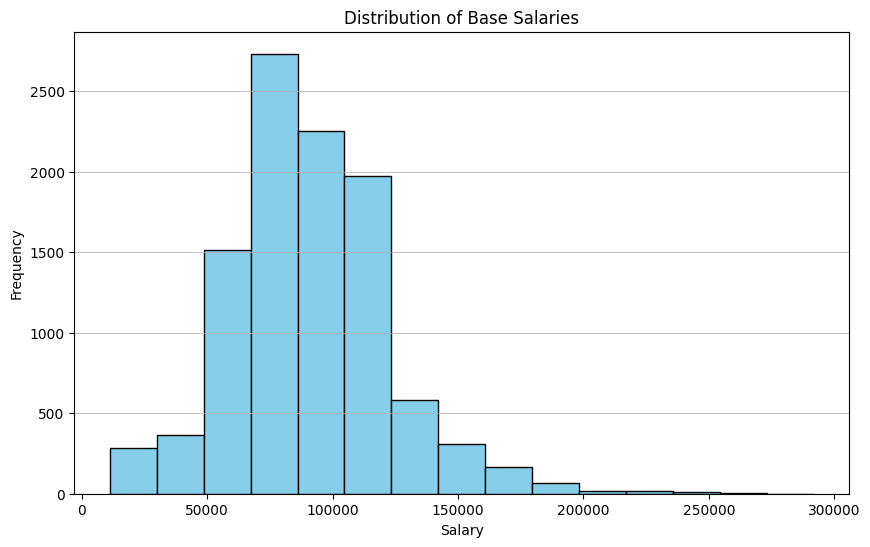

In [14]:
# Checking distibution of the Base_Salary
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(emp_sal['Base_Salary'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Base Salaries')
plt.grid(axis='y', alpha=0.75)
plt.show()

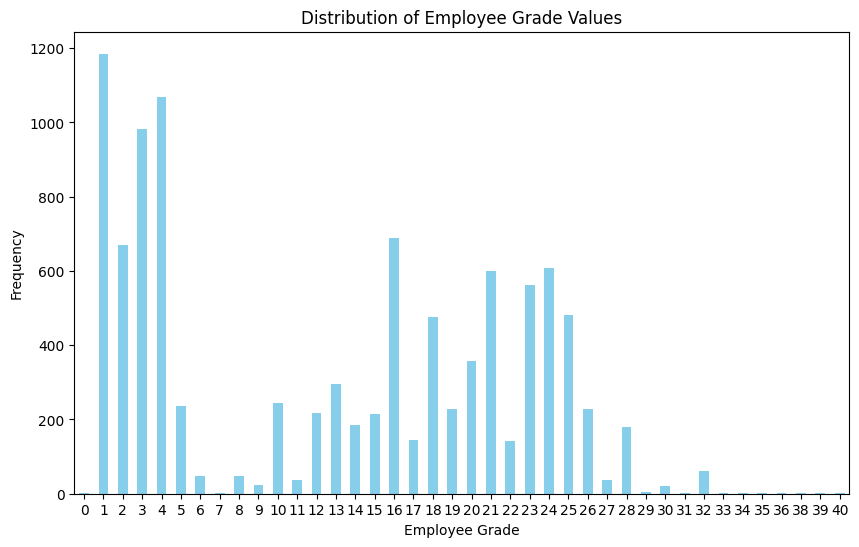

In [16]:
# Examining the distribution of 'Grade' values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
emp_sal['Grade'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Employee Grade Values')
plt.xlabel('Employee Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

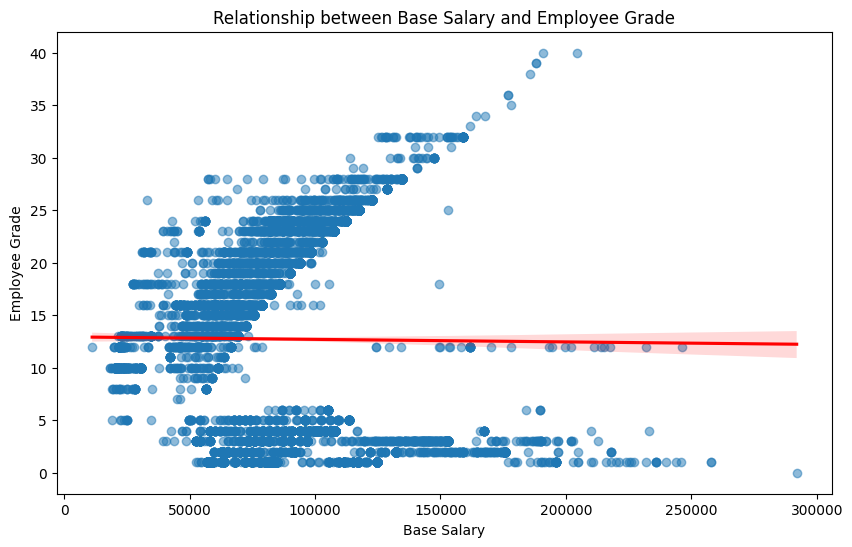

In [17]:
# Visualizing the relationship between 'Base Salary' and 'Employee Grade' 
# to identify potential linear or non-linear relationships

import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df' is your DataFrame with 'Base Salary' and 'Employee Grade' columns
plt.figure(figsize=(10, 6))
sns.regplot(x='Base_Salary', y='Grade', data=emp_sal, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Base Salary and Employee Grade')
plt.xlabel('Base Salary')
plt.ylabel('Employee Grade')
plt.show()

In [20]:
# Calculating correlation coefficient between 'Base Salary' and 'Employee Grade' 

correlation_coefficient = emp_sal['Base_Salary'].corr(emp_sal['Grade'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.008134351581970926
